# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 570


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&APPID={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | kailua-kona
Processing Record 4 of Set 1 | torzhok
Processing Record 5 of Set 1 | yeppoon
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | isafjordur
Processing Record 8 of Set 1 | akrehamn
Processing Record 9 of Set 1 | asaita
Processing Record 10 of Set 1 | mabaruma
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | saint-pierre
Processing Record 13 of Set 1 | atafu village
Processing Record 14 of Set 1 | puerto ayacucho
Processing Record 15 of Set 1 | vredendal
Processing Record 16 of Set 1 | nastola
Processing Record 17 of Set 1 | lodwar
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | kantunilkin
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | howard springs
Processing Record 22 of Set 1 | matoury
Proce

Processing Record 40 of Set 4 | choyr
Processing Record 41 of Set 4 | midvagur
Processing Record 42 of Set 4 | hermanus
Processing Record 43 of Set 4 | posto fiscal rolim de moura
Processing Record 44 of Set 4 | arauca
Processing Record 45 of Set 4 | invercargill
Processing Record 46 of Set 4 | bereket
Processing Record 47 of Set 4 | ornskoldsvik
Processing Record 48 of Set 4 | kill devil hills
Processing Record 49 of Set 4 | port saint john's
Processing Record 0 of Set 5 | guanica
Processing Record 1 of Set 5 | yeed
Processing Record 2 of Set 5 | novodvinsk
Processing Record 3 of Set 5 | nova sintra
Processing Record 4 of Set 5 | bilibino
Processing Record 5 of Set 5 | maintirano
Processing Record 6 of Set 5 | nemuro
Processing Record 7 of Set 5 | luanda
Processing Record 8 of Set 5 | solok
Processing Record 9 of Set 5 | susuman
Processing Record 10 of Set 5 | glubokoye
Processing Record 11 of Set 5 | lorengau
Processing Record 12 of Set 5 | sisimiut
Processing Record 13 of Set 5 | ar

Processing Record 33 of Set 8 | port glaud
City not found. Skipping...
Processing Record 34 of Set 8 | kirovsk
Processing Record 35 of Set 8 | onega
Processing Record 36 of Set 8 | desaguadero
Processing Record 37 of Set 8 | balaipungut
Processing Record 38 of Set 8 | paita
Processing Record 39 of Set 8 | winneba
Processing Record 40 of Set 8 | happy valley-goose bay
Processing Record 41 of Set 8 | oyama
Processing Record 42 of Set 8 | laojunmiao
Processing Record 43 of Set 8 | westport
Processing Record 44 of Set 8 | bredy
Processing Record 45 of Set 8 | tobi village
City not found. Skipping...
Processing Record 46 of Set 8 | kribi
Processing Record 47 of Set 8 | tindouf
Processing Record 48 of Set 8 | olinda
Processing Record 49 of Set 8 | lata
Processing Record 0 of Set 9 | port macquarie
Processing Record 1 of Set 9 | nogliki
Processing Record 2 of Set 9 | waingapu
Processing Record 3 of Set 9 | ulan bator
Processing Record 4 of Set 9 | castrocaro terme e terra del sole
Processing 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,25.02,81,29,3.90,PN,1706911518
1,ribeira grande,38.5167,-28.7000,17.65,94,40,4.02,PT,1706911535
2,kailua-kona,19.6406,-155.9956,24.98,97,100,10.80,US,1706911536
3,torzhok,57.0436,34.9622,-6.42,89,77,4.80,RU,1706911538
4,yeppoon,-23.1333,150.7333,26.88,68,0,1.36,AU,1706911539


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,25.02,81,29,3.90,PN,1706911518
1,ribeira grande,38.5167,-28.7000,17.65,94,40,4.02,PT,1706911535
2,kailua-kona,19.6406,-155.9956,24.98,97,100,10.80,US,1706911536
3,torzhok,57.0436,34.9622,-6.42,89,77,4.80,RU,1706911538
4,yeppoon,-23.1333,150.7333,26.88,68,0,1.36,AU,1706911539


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

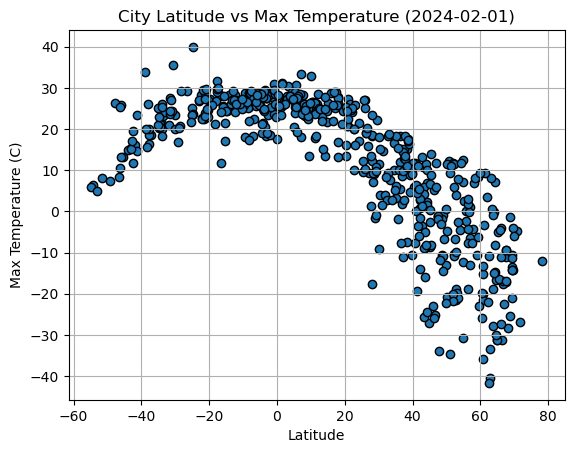

In [8]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.scatter(x,y,edgecolors="black")
# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs Max Temperature (2024-02-01)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

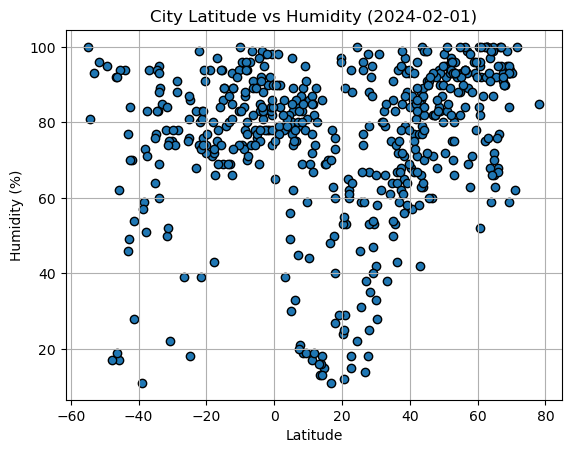

In [9]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]
plt.scatter(x,y,edgecolors="black")
# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs Humidity (2024-02-01)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

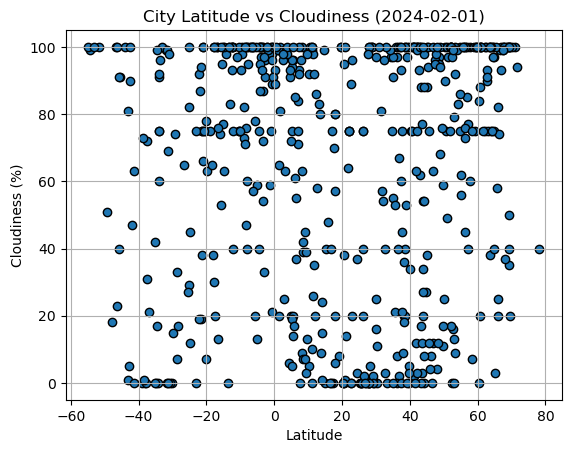

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]
plt.scatter(x,y,edgecolors="black")
# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs Cloudiness (2024-02-01)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

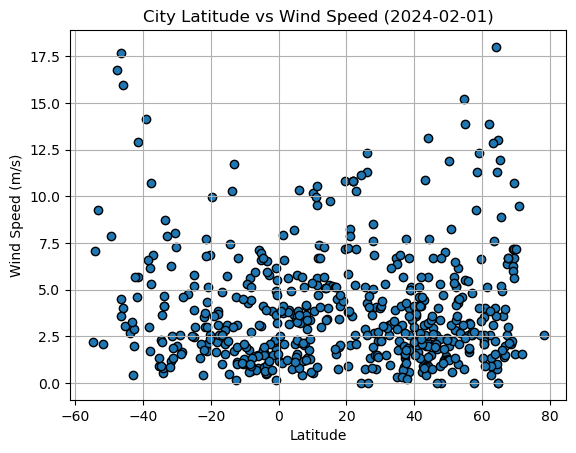

In [11]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]
plt.scatter(x,y,edgecolors="black")
# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs Wind Speed (2024-02-01)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression(x,y,x_,y_):
    plt.scatter(x,y)
    slope, intercept, r, p, se = linregress(x,y)
    y_regress = slope * x + intercept
    plt.plot(x,y_regress,color="red")
    equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
    plt.annotate(equation,xy =(x_,y_), color="red",fontsize= 12)
    print(f"The r-value is: {r**2}")              
    plt.xlabel("Latitude")
    plt.ylabel(y.name)
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ribeira grande,38.5167,-28.7000,17.65,94,40,4.02,PT,1706911535
2,kailua-kona,19.6406,-155.9956,24.98,97,100,10.80,US,1706911536
3,torzhok,57.0436,34.9622,-6.42,89,77,4.80,RU,1706911538
6,isafjordur,66.0755,-23.1240,-3.98,68,20,3.60,IS,1706911540
7,akrehamn,59.2667,5.1833,8.33,93,75,12.35,NO,1706911540


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,25.02,81,29,3.90,PN,1706911518
4,yeppoon,-23.1333,150.7333,26.88,68,0,1.36,AU,1706911539
5,port-aux-francais,-49.3500,70.2167,7.28,95,51,7.88,TF,1706911528
11,saint-pierre,-21.3393,55.4781,23.82,83,75,7.72,RE,1706911543
12,atafu village,-8.5421,-172.5159,28.59,78,100,5.65,TK,1706911543


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6820763635362836


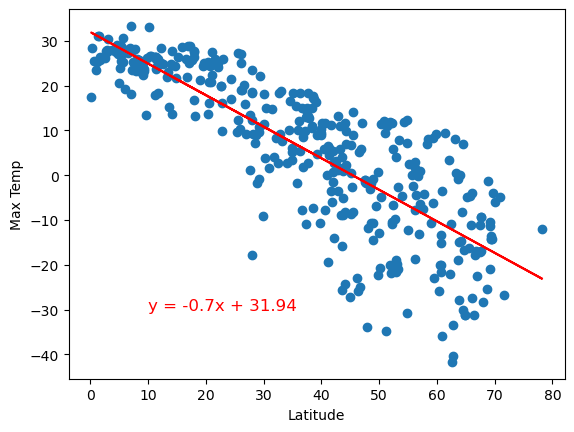

In [27]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
linear_regression(x,y,10,-30)

The r-value is: 0.31176230792977155


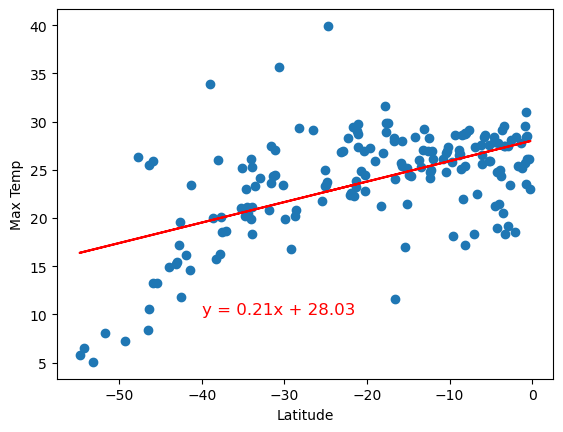

In [28]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
linear_regression(x,y,-40,10)

**Discussion about the linear relationship:** There appears to be a strong relationship between latitude and temperature in northern hemisphere data. An r-value of .68 on a scale of 0-1 reveals a correlation and the points on the scatter plot form a line. The southern hemisphere data gives us a .31 r-value correlation which is not as strong a relationship, but there are still clusters of points on the chart that identify a relationship here.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1667016762750941


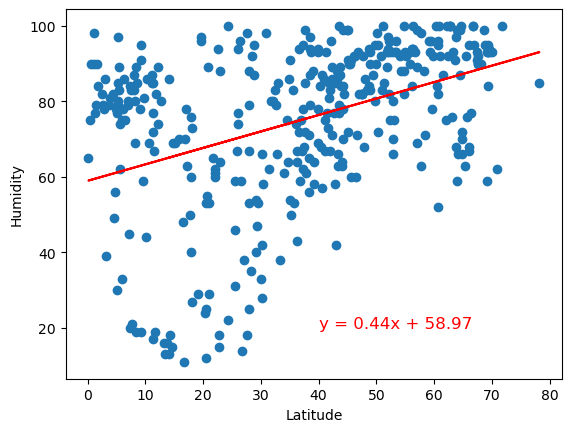

In [29]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
linear_regression(x,y,40,20)

The r-value is: 0.11341528527060056


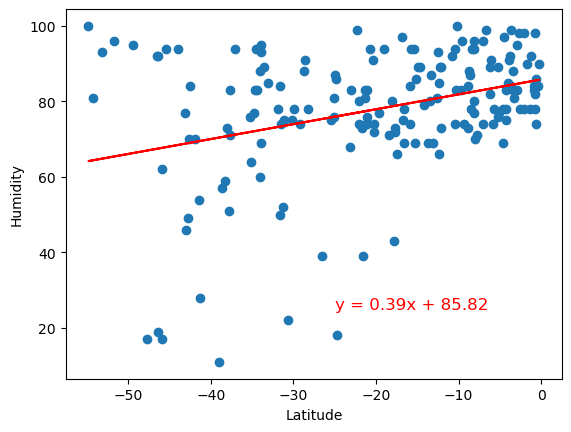

In [30]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
linear_regression(x,y,-25,25)

**Discussion about the linear relationship:** Here you can observe a looser relationship between humidity and latitude. The r-value measuring linear regression which reveals correlation is only .11 and .16 on a scale between 0-1. The points on the chart show many outliers and its hard to identify a pattern.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.04164202889065842


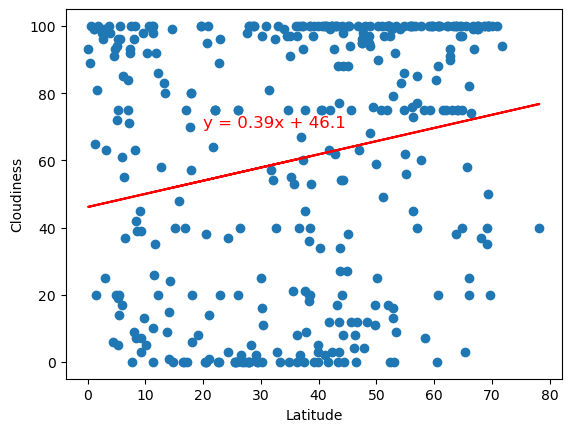

In [31]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
linear_regression(x,y,20,70)

The r-value is: 0.10551080656682807


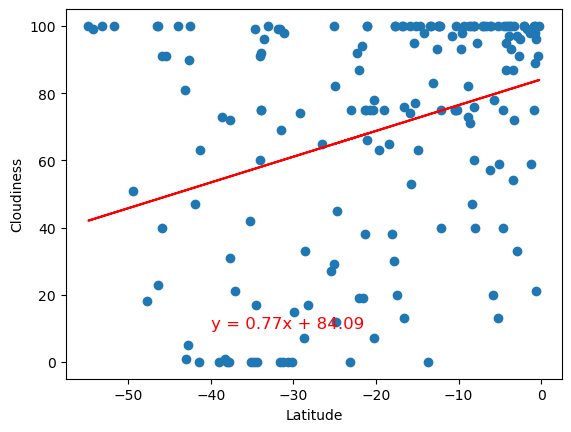

In [32]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
linear_regression(x,y,-40,10)

**Discussion about the linear relationship:** Theres not a strong relationship between cloudiness and latitude. The R-values are very low for both hemispheres and the points do not form a line on the scatter plot. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0016446515012265668


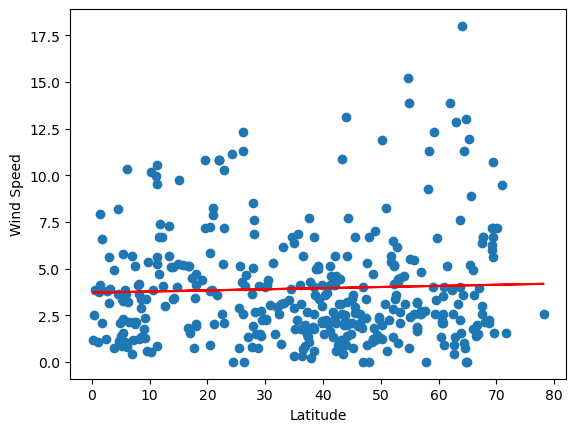

In [33]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
linear_regression(x,y,10,-30)

The r-value is: 0.11072202643955212


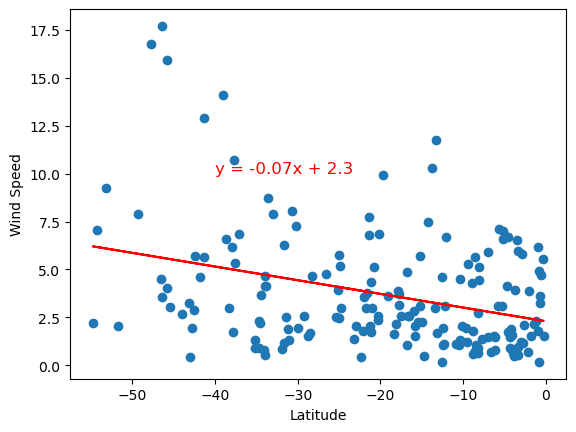

In [34]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
linear_regression(x,y,-40,10)

**Discussion about the linear relationship:** Wind speed and latitude dont show a strong correlation between both hemispheres. R-Values are .11 and .002 respectively so a relationship is not identified in patterns within the weather data. 